In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Loading the data into dataframe from csv files
df = pd.read_csv("/users/prashant/desktop/SampleSuperstore.csv")

In [3]:
# Top 5 rows
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#Last 5 rows
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
#size of dataframe
df.shape

(9994, 13)

In [6]:
#Information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
#Finding unique values in columns
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [8]:
#To check if there is any null value
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
#Dropping the unwanted columns
new_df = df.drop( "Postal Code" ,axis =1).head()
new_df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
#To view some  basic statistics
new_df.describe()

,Sales,Quantity,Discount,Profit
count,5.000000,5.00000,5.000000,5.000000
mean,397.693100,2.80000,0.130000,-22.429520
std,427.559626,1.30384,0.198746,220.354194
min,14.620000,2.00000,0.000000,-383.031000
25%,22.368000,2.00000,0.000000,2.516400
50%,261.960000,2.00000,0.000000,6.871400
75%,731.940000,3.00000,0.200000,41.913600
max,957.577500,5.00000,0.450000,219.582000


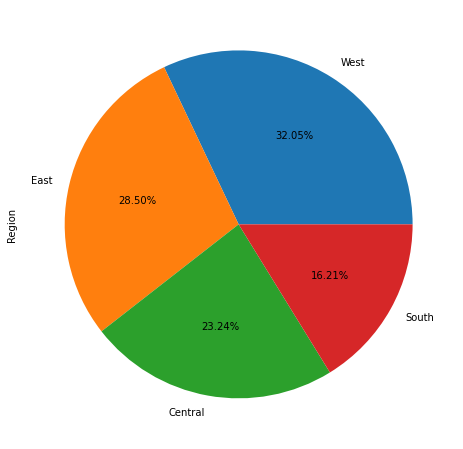

In [11]:
#Counting and plotting the orders from diffrent regions
plt.figure(figsize = (10,8))
region_count = df["Region"].value_counts()
region_count.plot(kind = "pie",autopct = '%.2f%%')
plt.show()

# Insights - From the above pie chart,we can see that minimum orders are from South region i.e 16.21%.

In [12]:
#Retrieving the Profit and Sales across different states
sales = df.groupby("State")[["Sales","Profit"]].sum().sort_values("Sales",ascending = False)
print(sales)

                            Sales      Profit
State                                        
California            457687.6315  76381.3871
New York              310876.2710  74038.5486
Texas                 170188.0458 -25729.3563
Washington            138641.2700  33402.6517
Pennsylvania          116511.9140 -15559.9603
Florida                89473.7080  -3399.3017
Illinois               80166.1010 -12607.8870
Ohio                   78258.1360 -16971.3766
Michigan               76269.6140  24463.1876
Virginia               70636.7200  18597.9504
North Carolina         55603.1640  -7490.9122
Indiana                53555.3600  18382.9363
Georgia                49095.8400  16250.0433
Kentucky               36591.7500  11199.6966
New Jersey             35764.3120   9772.9138
Arizona                35282.0010  -3427.9246
Wisconsin              32114.6100   8401.8004
Colorado               32108.1180  -6527.8579
Tennessee              30661.8730  -5341.6936
Minnesota              29863.1500 

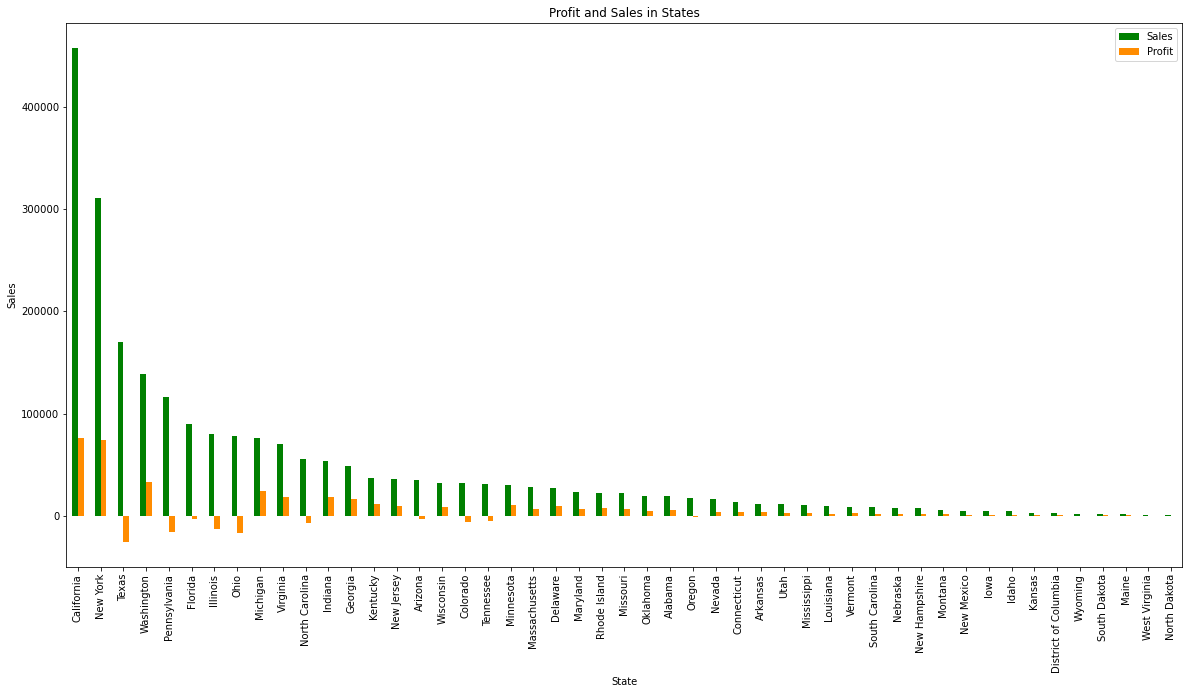

In [13]:
#Plotting the findings
sales.plot(kind = "bar",color = ["green","darkorange"],figsize = (20,10))
plt.ylabel("Sales")
plt.title("Profit and Sales in States")
plt.show()

# Insights - Sales and profits are maximum at  California and minimum at North Dakota but store should focus in Texas where  it  is facing a huge loss,store should invest more in California and New york so that it can earn more profit.

In [14]:
#Finding the Profit and Sales across different categories
category = df.groupby("Category")[["Profit","Sales"]].sum().sort_values(["Profit","Sales"],ascending = False)
print(category)

                      Profit        Sales
Category                                 
Technology       145454.9481  836154.0330
Office Supplies  122490.8008  719047.0320
Furniture         18451.2728  741999.7953


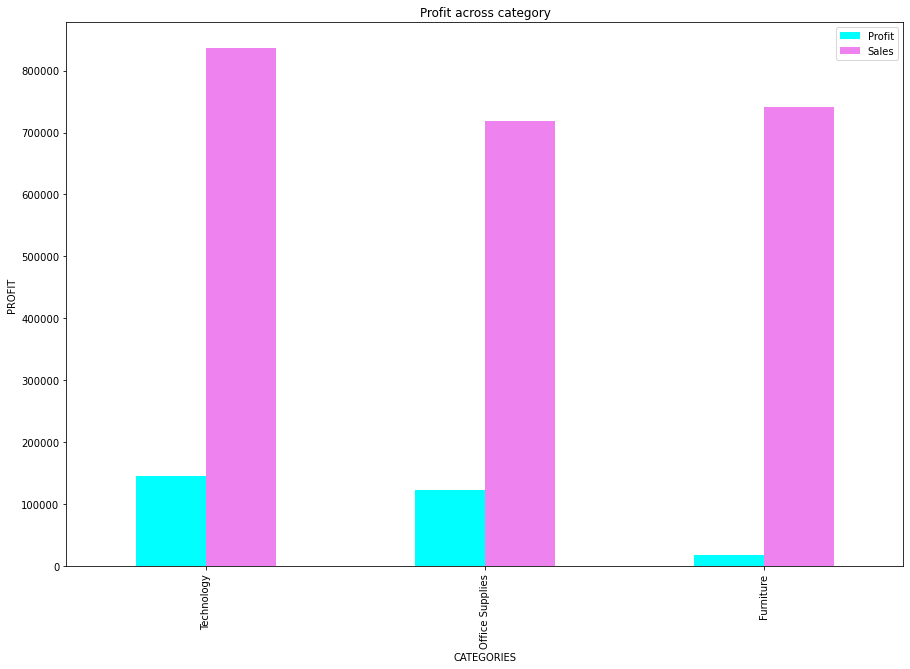

In [15]:
#Plotting the findings
category.plot(kind = "bar",color = ["cyan","violet"] ,figsize = (15,10))
plt.xlabel("CATEGORIES")
plt.ylabel("PROFIT")
plt.title("Profit across category")
plt.show()

# Insights - Maximum sales and profits are from technology,but if  we compare office supplies and furniture categories  sales are more in funiture category but profits are  less.

              Profit        Sales
Region                           
Central   39706.3625  501239.8908
East      91522.7800  678781.2400
South     46749.4303  391721.9050
West     108418.4489  725457.8245


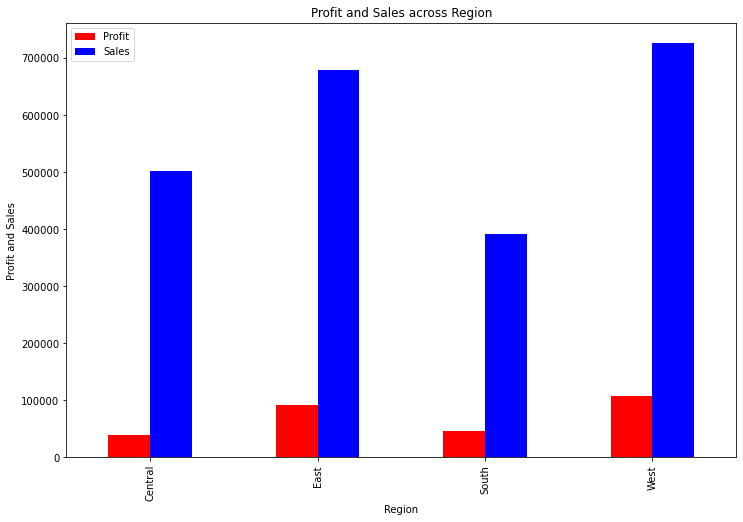

In [16]:
#finding and plotting the profit and sales across region
region = df.groupby("Region")[["Profit","Sales"]].sum()
region.plot(kind = "bar",color =["red","blue"],figsize =(12,8))
plt.ylabel("Profit and Sales")
plt.title("Profit and Sales across Region")
print(region)



In [17]:
city = df.groupby("City")[["Sales","Profit"]].sum().sort_values(["Profit","Sales"])
print(city)

                     Sales      Profit
City                                  
Philadelphia   109077.0130 -13837.7674
Houston         64504.7604 -10153.5485
San Antonio     21843.5280  -7299.0502
Lancaster        9891.4640  -7239.0684
Chicago         48539.5410  -6654.5688
...                    ...         ...
Detroit         42446.9440  13181.7908
San Francisco  112669.0920  17507.3854
Seattle        119540.7420  29156.0967
Los Angeles    175851.3410  30440.7579
New York City  256368.1610  62036.9837

[531 rows x 2 columns]


In [18]:
#retrieving the profit and sales across different segment
segment = df.groupby("Segment")[["Profit","Sales"]].sum()
print(segment)

                  Profit         Sales
Segment                               
Consumer     134119.2092  1.161401e+06
Corporate     91979.1340  7.061464e+05
Home Office   60298.6785  4.296531e+05


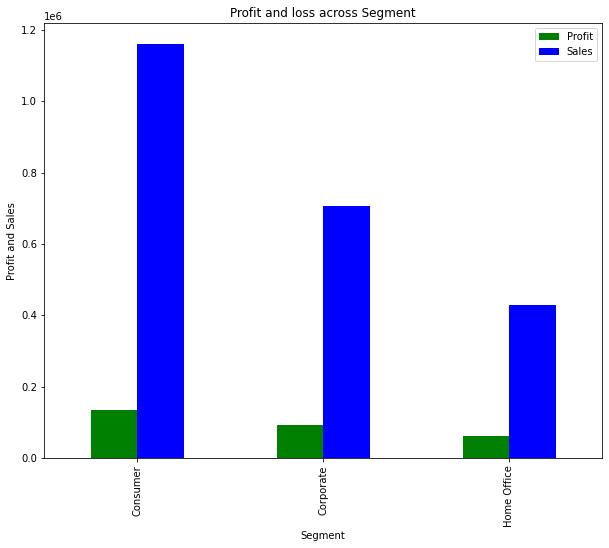

In [19]:
#Plotting the findings
segment.plot(kind = "bar",color = ["green","blue"],figsize = (10,8))
plt.ylabel("Profit and Sales")
plt.title("Profit and loss across Segment")
plt.show()

# Insights - Sales and profits are more in consumer segment and less in home office.

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64


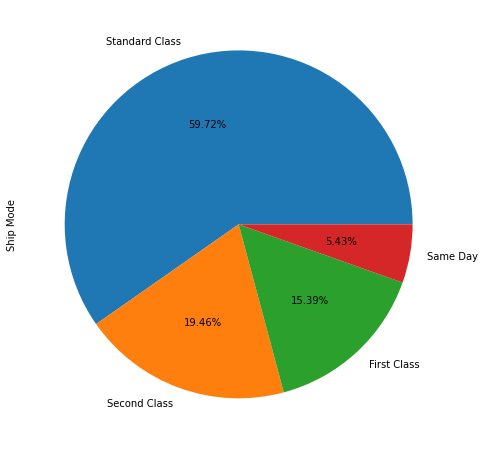

In [20]:
#counting and plotting the shipmode used by the customers
shipmode = df["Ship Mode"].value_counts()
print(shipmode)
shipmode.plot(kind = "pie",autopct = "%.2f%%",figsize =(10,8))
plt.show()

# Insights -  More Customers choose standard class as their shipping mode                               whereas very few customers choose same day mode of shipment. 

# Top 5 States with Sales,Profit and Discount

In [21]:
#Adding a new column in the dataframe by scaling discount 
df["Scaled_discount"] = df["Discount"]*1000

,Profit,Scaled_discount,Sales
State,,,
California,76381.3871,145600.0,457687.6315
New York,74038.5486,62400.0,310876.2710
Washington,33402.6517,32400.0,138641.2700
Michigan,24463.1876,1800.0,76269.6140
Virginia,18597.9504,0.0,70636.7200


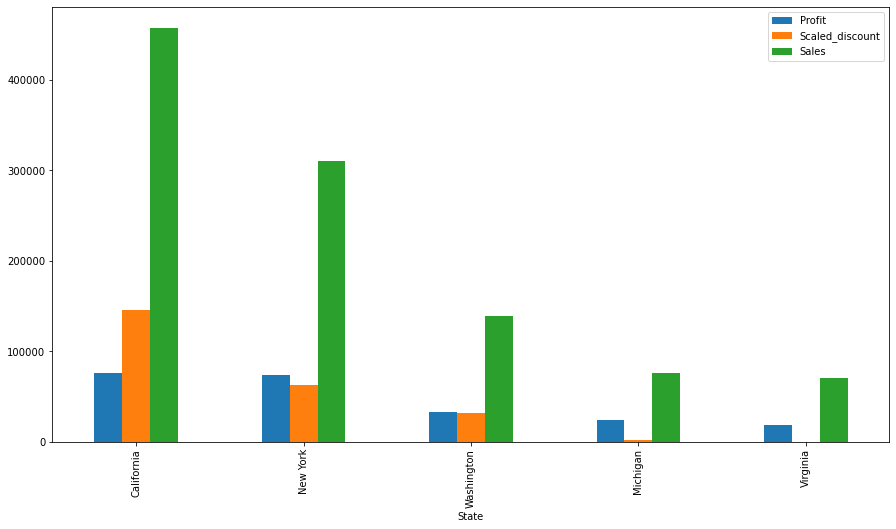

In [22]:
#Finding top 5 countries with maximum profit,discount and sales
top = df.groupby("State")[["Profit","Scaled_discount","Sales"]].sum().sort_values("Profit",ascending = False)
top5 = top.head()
top5.plot(kind = "bar",figsize = (15,8))
top5

<AxesSubplot:>

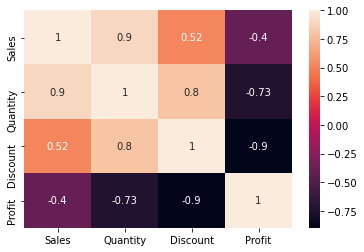

In [23]:
#Finding correlation between the continuous variables
corr = new_df.corr()
sns.heatmap(corr,xticklabels = corr.columns,yticklabels = corr.columns,annot =True)

In [24]:
#Finding the correlation between Sales and rest of  continous variables
corr["Sales"].sort_values(ascending = False)

Sales       1.000000
Quantity    0.903144
Discount    0.520392
Profit     -0.398888
Name: Sales, dtype: float64

# Sales are positively correlated with quantity and discount but there is no correlation exists  between sales and profit.